### 14_optimizers_regularizers_callbacks
kernel_regularizer=regularizers.l2(0.02)  
bias_regularizer=regularizers.l2(0.02)  
class fitHistory(keras.callbacks.Callback):  
mcpt = ModelCheckpoint(file_path, monitor="val_accuracy", mode="max", verbose=1, save_best_only=True)  
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=5)  
model = Sequential()  
model.load_weights(weight_path)  

In [1]:
import os, sys, re
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, UpSampling2D
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img, ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request
import tarfile
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# regularizers 正規化 L1 L2

In [11]:
seed = 10
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("input shape",X_train.shape[1:])
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=X_train.shape[1:],
                 kernel_regularizer=regularizers.l2(0.02), bias_regularizer=regularizers.l2(0.02)))                 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu",
                 kernel_regularizer=regularizers.l2(0.02), bias_regularizer=regularizers.l2(0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

input shape (32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 - 50s - loss: 1.9278 - accuracy: 0.3896 - val_loss: 1.5523 - val_accuracy: 0.4988
Epoch 2/3
40000/40000 - 48s - loss: 1.5142 - accuracy: 0.5017 - val_loss: 1.3953 - val_accuracy: 0.5522
Epoch 3/3
40000/40000 - 48s - loss: 1.3982 - accuracy: 0.5451 - val_loss: 1.3074 - val_accuracy: 0.5926
Testing
測試資料集的準確度 = 0.59


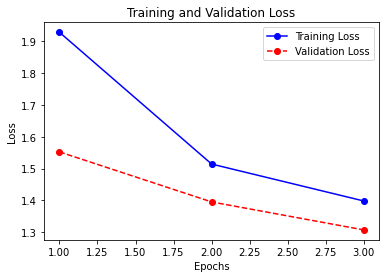

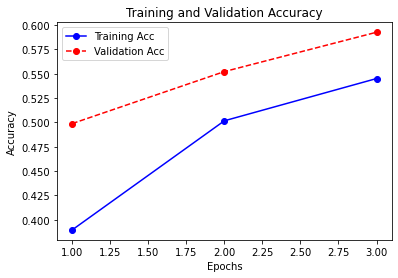

In [12]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=3, batch_size=128, verbose=2)
print("Testing")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 自訂 optimizer
## SGD 
MBGD(Mini-Batch Gradient Descent) 最小批次量梯度下降，在每一次的迭代使用批次數的樣本數量來計算梯度，而且對每一個參數都是使用相同的學習率來進行更新
SGD的問題是如果學習率太小，收斂速度會很慢，而且很容易找到局部最優解，而不是全域最佳解

In [14]:
print("input shape",X_train.shape[1:])
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.summary()

# SGD
opt_sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=.09)
model.compile(loss="categorical_crossentropy", optimizer=opt_sgd, metrics=["accuracy"])

input shape (32, 32, 3)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 63)        18207     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 63)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 8, 63)          0         
_________________________________________________________________
flatten_3 (Flatten)          (

In [15]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=3, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 - 50s - loss: 2.0267 - accuracy: 0.2652 - val_loss: 1.8119 - val_accuracy: 0.3659
Epoch 2/3
40000/40000 - 48s - loss: 1.7222 - accuracy: 0.3848 - val_loss: 1.6451 - val_accuracy: 0.4179
Epoch 3/3
40000/40000 - 49s - loss: 1.5506 - accuracy: 0.4428 - val_loss: 1.4960 - val_accuracy: 0.4756

Testing ...
測試資料集的準確度 = 0.48


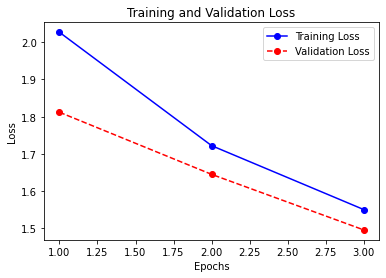

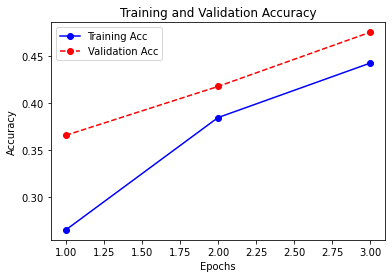

In [16]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## optimizers.Adam
自適應性學習率的優化器，指每一個參數更新都會使用數學公式計算出客製化更新的學習率

In [17]:
print("input shape",X_train.shape[1:])
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.summary()

# Adam
opt_adam = optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt_adam, metrics=["accuracy"])

input shape (32, 32, 3)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (

In [18]:
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=3, batch_size=128, verbose=2)
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 - 50s - loss: 1.7055 - accuracy: 0.3784 - val_loss: 1.3688 - val_accuracy: 0.5229
Epoch 2/3
40000/40000 - 48s - loss: 1.2918 - accuracy: 0.5360 - val_loss: 1.1419 - val_accuracy: 0.6066
Epoch 3/3
40000/40000 - 48s - loss: 1.1407 - accuracy: 0.5975 - val_loss: 1.0715 - val_accuracy: 0.6332

Testing ...
測試資料集的準確度 = 0.64


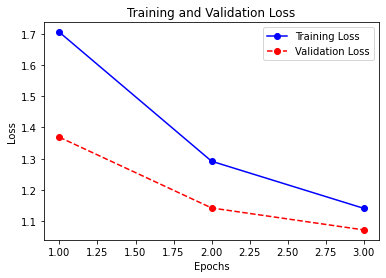

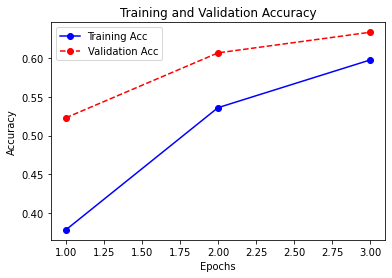

In [19]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## optimizers.RMSprop
自適應性學習率的優化器，指每一個參數更新都會使用數學公式計算出客製化更新的學習率
RMSProp的作法是增加一個衰減系統，能夠以之前每一次梯度的變化情況來自動更新學習率，緩解Adagrad學習率急遽下降的問題

In [20]:
print("input shape",X_train.shape[1:])
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.summary()

# Adam
opt_rms = optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt_rms, metrics=["accuracy"])

input shape (32, 32, 3)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (

In [21]:
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=3, batch_size=128, verbose=2)
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 - 53s - loss: 1.6229 - accuracy: 0.4123 - val_loss: 1.3143 - val_accuracy: 0.5391
Epoch 2/3
40000/40000 - 43s - loss: 1.2625 - accuracy: 0.5515 - val_loss: 1.1343 - val_accuracy: 0.6141
Epoch 3/3
40000/40000 - 37s - loss: 1.1237 - accuracy: 0.6004 - val_loss: 1.0386 - val_accuracy: 0.6456

Testing ...
測試資料集的準確度 = 0.64


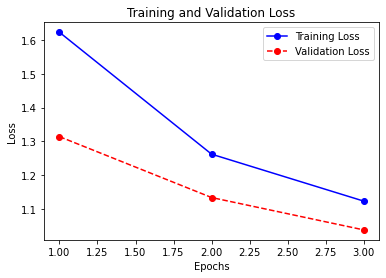

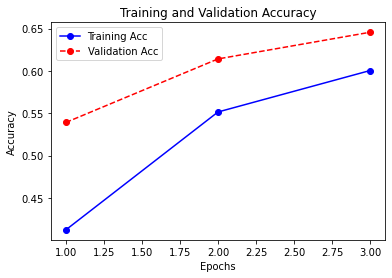

In [22]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# BatchNormalization Activation
批次正規化，雖然送入的資料已經標準化，但是在調整權重更新參數值後，有可能在神經網路中再次讓資料變得太大或太小。
例如Tanh函數是在-1~1之間，超過這個範圍，輸出值就沒有任何敏感度

In [24]:
seed=7
np.random.seed(seed)
df_train = pd.read_csv(os.path.join(".","train_data","titanic_train.csv"))
df_test = pd.read_csv(os.path.join(".","train_data","titanic_test.csv"))
dataset_train = df_train.values
dataset_test = df_test.values
# 分割成特徵資料和標籤資料
X_train = dataset_train[:,0:9]
Y_train = dataset_train[:,9]
X_test = dataset_test[:,0:9]
Y_test = dataset_test[:,9]
# 特徵標準化
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)

In [28]:
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(11, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
print("Training ...")
history = model.fit(X_train, Y_train, verbose=2,
                    validation_data=(X_test, Y_test), 
                    epochs=3, batch_size=10)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 11)                99        
_________________________________________________________________
batch_normalization_2 (Batch (None, 11)                44        
_________________________________________________________________
activation_2 (Activation)    (None, 11)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 11)                121       
_________________________________________________________________
batch_normalization_3 (Batch (None, 11)                44        
_________________________________________________________________
activation_3 (Activation)    (None, 11)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

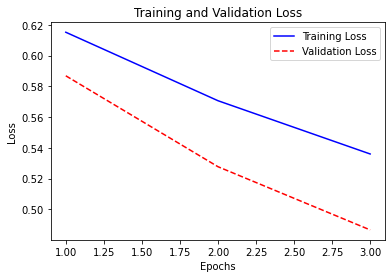

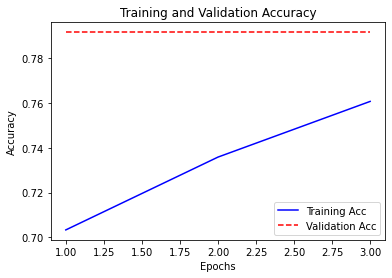

In [29]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, "b-", label="Training Loss")
plt.plot(epochs, val_loss, "r--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=3, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18432     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 16, 16, 64)      

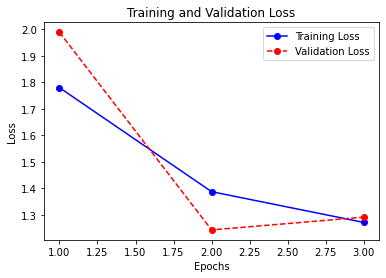

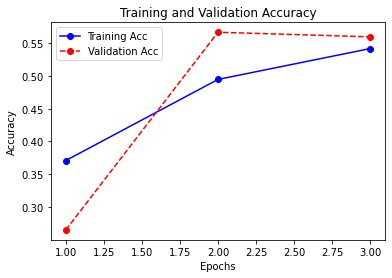

In [32]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# keras.callbacks
## 在正確的時間點停止模型訓練
建立 fitHistory 物件

In [33]:
np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv(os.path.join(".","train_data","diabetes.csv"))
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()  # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import Callback
# 繼承 Callback 類別建立 fitHistory 類別
class fitHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.acc.append(logs.get("accuracy"))
        self.losses.append(logs.get('loss'))
# 建立 fitHistory 物件
history = fitHistory()
model.fit(X, Y, batch_size=64, epochs=3, verbose=0,
          callbacks=[history])

print("筆數: ", len(history.acc))
print(history.acc)
print("筆數: ", len(history.losses))
print(history.losses)
# 評估模型
loss, accuracy = model.evaluate(X, Y, verbose=0)
print("準確度 = {:.2f}".format(accuracy))


筆數:  36
[0.34375, 0.515625, 0.53125, 0.578125, 0.5875, 0.5989583, 0.55803573, 0.5722656, 0.5833333, 0.575, 0.546875, 0.55078125, 0.453125, 0.5234375, 0.5208333, 0.5625, 0.575, 0.5807292, 0.59598213, 0.61328125, 0.6197917, 0.63125, 0.62357956, 0.6119792, 0.671875, 0.6484375, 0.65625, 0.671875, 0.675, 0.6848958, 0.6808036, 0.6738281, 0.6631944, 0.6609375, 0.65909094, 0.66276044]
筆數:  36
[10.310762, 2.3392332, 1.8159481, 0.5523132, 1.2216232, 1.6364778, 2.5072246, 1.527868, 0.72383726, 0.84247744, 0.90224445, 0.8284466, 0.72711754, 0.7455419, 0.76372427, 0.62777805, 0.8444691, 0.636969, 0.64453995, 0.6639137, 0.6286702, 0.8299531, 0.70864564, 1.0507052, 0.63286865, 0.6502892, 0.5976484, 0.92699593, 0.77570474, 0.56582713, 0.61710334, 0.69634295, 0.7214881, 0.6315739, 0.67913747, 0.8073775]
準確度 = 0.67


## EarlyStopping
mode="min" / mode="max" 
評估有改進的標準，最小值 或 最大值 預設值是auto自動判斷

訓練資料集的準確度 = 0.67
測試資料集的準確度 = 0.69


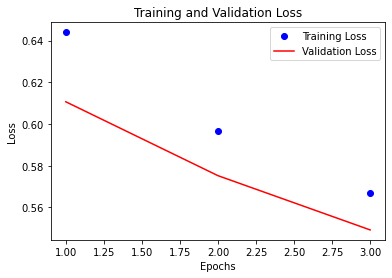

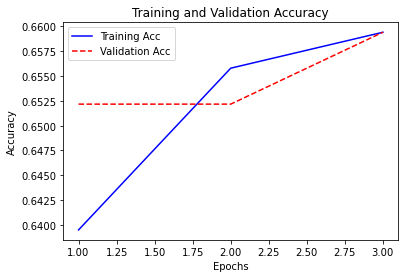

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv(os.path.join(".","train_data","diabetes.csv"))
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
from tensorflow.keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor="val_accuracy", mode="max",
                   verbose=1, patience=5)
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=10, 
          verbose=0, callbacks=[es])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ModelCheckpoint 
## 在模型訓練時自動儲存最佳權重


Epoch 00001: val_accuracy improved from -inf to 0.63768, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.63768 to 0.78261, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.78261
訓練資料集的準確度 = 0.71
測試資料集的準確度 = 0.69


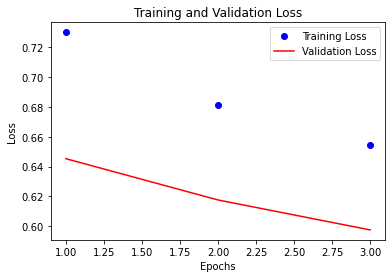

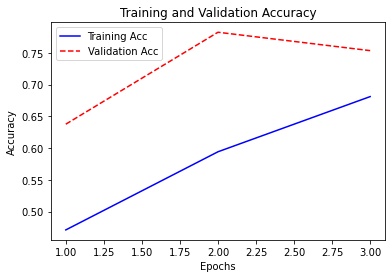

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint
np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv(os.path.join(".","train_data","diabetes.csv"))
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型

# 建立 ModelCheckpoint 物件
mc = ModelCheckpoint(os.path.join(".","model_data","best_model.h5"), monitor="val_accuracy", 
                     mode="max", verbose=1,
                     save_best_only=True)
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=10, 
          verbose=0, callbacks=[mc])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## model.load_weights("best_model.h5")

In [38]:
np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv(os.path.join(".","train_data","diabetes.csv"))
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.load_weights(os.path.join(".","model_data","best_model.h5"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

訓練資料集的準確度 = 0.67
測試資料集的準確度 = 0.62



Epoch 00001: val_accuracy improved from -inf to 0.64493, saving model to weights-01-0.64.h5

Epoch 00002: val_accuracy improved from 0.64493 to 0.71739, saving model to weights-02-0.72.h5

Epoch 00003: val_accuracy improved from 0.71739 to 0.75362, saving model to weights-03-0.75.h5
訓練資料集的準確度 = 0.75
測試資料集的準確度 = 0.78


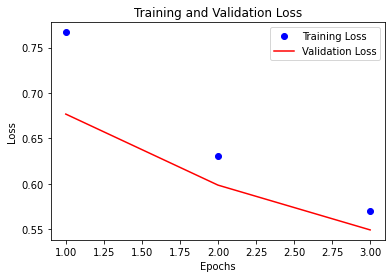

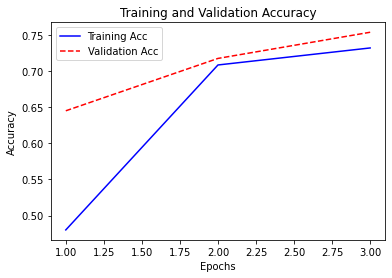

In [39]:
np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv(os.path.join(".","train_data","diabetes.csv"))
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
from tensorflow.keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor="val_loss", mode="min",
                   verbose=1)

from tensorflow.keras.callbacks import ModelCheckpoint
# 建立 ModelCheckpoint 物件
filename = "weights-{epoch:02d}-{val_accuracy:.2f}.h5"
mc = ModelCheckpoint(filename, monitor="val_accuracy", 
                     mode="max", verbose=1,
                     save_best_only=True)
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=10, 
          verbose=0, callbacks=[es, mc])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
